# A1: Web Scraping

In this assignment, you will scrape the [UW Time Schedule](https://www.washington.edu/students/timeschd/WIN2019/) to compute information about the course offerings in the current quarter.

## Identifying Departments
In this section, you will identify the link to each department or deree program from the time schedule. You will later use these to identify the courses offered by each program.

In [2]:
# Import libraries you would like to use
import requests as r
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs, SoupStrainer as ss


In [141]:
# Using beautiful soup, identify the links to each program on the time schedule page
a = []
allPrograms = []
page = r.get("http://www.washington.edu/students/timeschd/WIN2019/")
thisPage = bs(page.content, 'html.parser')
programs = thisPage.select('li a ')[:len(thisPage.select('ul li a '))-16]
for p in programs:
        a.append(p.get('href'))
a = set(a)
for pro in a:
    if pro != None:
        if pro.startswith('#') == False:
            if pro.startswith('/') == False:
                if pro.startswith('http') == False:
                    allPrograms.append(pro)






## Scrape Course Information for Each Program
In this section, you will iterate through each program's time schedule page (identified in the previous section). For each program's page, you will collect information about each course offered.

In [142]:
# For each degree program, scrape the following information for each course:
# - Department (e.g., "BIOL", "SOC")
# - Course Number (e.g., "370", "371")
# - Course Title (e.g., "DATA SCIENCE METHDS", "ADV DATA SCI METHDS")
# Store the resulting data in a Pandas data frame
department = []
number = []
title = []
allCourses = []
for x in allPrograms:
            coursePage = r.get("http://www.washington.edu/students/timeschd/WIN2019/" + x)
            thisCourse = bs(coursePage.content, 'html.parser')
            course = thisCourse.select('table b a')[11:]
            for c in course:
                allCourses.append(c.text)
# put department, course number, course title into different collections
for i, c in enumerate (allCourses):
    if (i % 2 != 0):
        title.append(c)
    else:
        number.append(int(c[len(c)-4 :len(c) - 1]))
        department.append(c[0:c.find('\xa0\xa0')])

courseInfo = pd.DataFrame ({
    'department': department,
    'title': title,
    'number': number
})




        

In [143]:
# Write the dataframe to a .csv file in this directory (make sure to exclude row numbers)
courseInfo.to_csv("courseInfo.csv", index = False)

##  Summary Statistics
In this section, you will use the dataframe of courses to answer questions about the courses offered. Unless otherwise stated, feel free to simply print out a number that answers a given question. 

In [144]:
# How many total courses are offered this quarter at UW?
totalCourse = courseInfo.shape[0]
print(totalCourse)


4550


In [145]:
# How many different departments are there on the time schedule?
totalDepart = len(courseInfo.groupby(department).department)
print(totalDepart)



286


In [146]:
# Which department offers the fewest courses, and how many courses does it offer?
# Print out the sentence: "The department with the fewest courses is ____, offering ___ courses."

minNum = courseInfo.groupby(department).department.count().min()
# find all the number of courses provided by each department
a = courseInfo.groupby(department).department.count()
# find the departmetn with the fewest course 
minName = a[a == minNum]
minNameList = list(minName.index)
# a = courseInfo.groupby(department).count()
# minName = a.loc[a.number == minNum]
# minName = a[a['number'] == maxNum]
print("The department with the fewest courses is "  + ", ".join(minNameList) +  ", offering " + str(minNum) + " courses.")





The department with the fewest courses is ACADEM, ARTSCI, BA RM, BCMS, C ENV, COPTIC, DPHS, HPS, HSMGMT, HSTLAC, HUBIO, IECMH, INDIV, LEAD, LIT, MARBIO, N&MES, PHRMRA, PROS, ROMN, SLVN, STSS, UKR, VALUES, offering 1 courses.


In [147]:
# Which department has the most courses, and how many courses does it offer?
# Print out the sentence: "The department with the most courses is ____, offering ___ courses."

maxNum = courseInfo.groupby(department).department.count().max()
# find all the number of courses provided by each department
b = courseInfo.groupby(department).department.count()
# find the department with the most course 
maxName = b[b == maxNum]
maxNameList = list(maxName.index)
print("The department with the most courses is "  + "".join(maxNameList) +  ", offering " + str(maxNum) + " courses.")


The department with the most courses is MUSICP, offering 139 courses.


In [148]:
# What is the average number of courses offered by each department?
totalCourse/totalDepart

15.909090909090908

In [149]:
# How many 100 level courses are offered next quarter?
len(courseInfo[courseInfo['number'] < 200])

204

In [150]:
# Which departments offer the hardest courses (as assessed by average course number)?
averageList = courseInfo.groupby(department).number.mean()
hardest = averageList[averageList == averageList.max()]
"".join(list(hardest.index))

'N&MES'

## Data Visualization
In this section, you will use visualization techniques to answer questions of interest. Make sure to include clear axis labels and chart titles for each graph.

Text(0.5, 1.0, 'Top 10 Departments offering most number of courses')

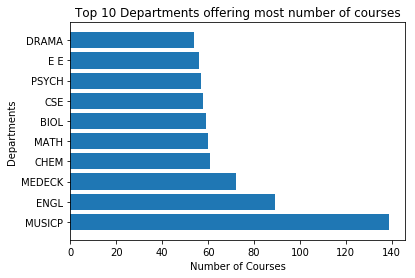

In [151]:
# Which departments offer the highest number of courses?
# Use a horizontal bar chart of the 10 departments with the highest number of courses to answer this question
numCourses = courseInfo.groupby(department).title.count()
data = numCourses.nlargest(10)
# plt.hist(row = list(data.index), column = data.values, bins = 10)
# data.plot(kind='bar')
plt.barh(data.index, data.values)
plt.ylabel("Departments")
plt.xlabel("Number of Courses")
plt.title("Top 10 Departments offering most number of courses")


Text(0.5, 1.0, 'Top 10 Departments offering hardest courses')

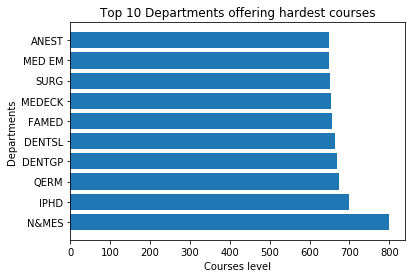

In [152]:
# Which departments offer the hardest courses?
# Use a horizontal bar chart of the 10 departments with the highest average course number to answer this question
thisData = averageList.nlargest(10)
plt.barh(thisData.index, thisData.values)
plt.ylabel("Departments")
plt.xlabel("Courses level")
plt.title("Top 10 Departments offering hardest courses")



Text(0.5, 1.0, 'Relationship Between the Number of Courses and the Difficulty')

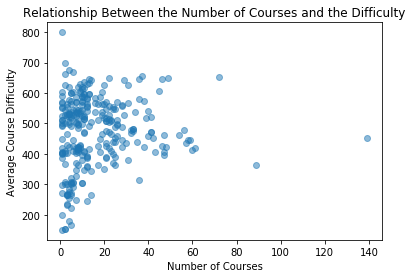

In [153]:
# What is the relationship between the number of courses offered and the difficulty?
# Use a scatter plot of number of courses v.s. average course difficult to assess this relationship
plt.scatter(numCourses, averageList, alpha = 0.5)
plt.xlabel('Number of Courses')
plt.ylabel('Average Course Difficulty')
plt.title('Relationship Between the Number of Courses and the Difficulty')

_I feel like the middle level difficulty tend to have the most courses offered, and the easiest and hardest difficulty tend to have the least amount of courses_

Text(0.5, 1.0, 'Number of Courses falls into different levels')

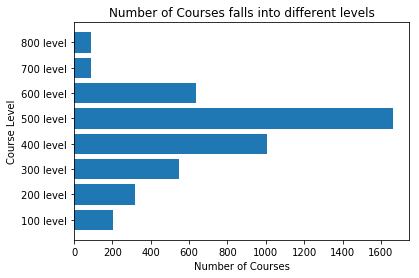

In [154]:
# How many courses fall into each level (100, 200, etc?)?
# Use a horizontal bar chart of the number of courses of each level to answer this questions
courseLevel = ['100 level', '200 level', '300 level', '400 level', '500 level', '600 level', '700 level', '800 level']
levelNum = [len(courseInfo[courseInfo['number'] < 200]),
           len(courseInfo[courseInfo['number'] < 300]) - len(courseInfo[courseInfo['number'] < 200]),
           len(courseInfo[courseInfo['number'] < 400]) - len(courseInfo[courseInfo['number'] < 300]),
           len(courseInfo[courseInfo['number'] < 500]) - len(courseInfo[courseInfo['number'] < 400]),
           len(courseInfo[courseInfo['number'] < 600]) - len(courseInfo[courseInfo['number'] < 500]),
           len(courseInfo[courseInfo['number'] < 700]) - len(courseInfo[courseInfo['number'] < 600]),
           len(courseInfo[courseInfo['number'] < 800]) - len(courseInfo[courseInfo['number'] < 700]),
           len(courseInfo[courseInfo['number'] < 900]) - len(courseInfo[courseInfo['number'] < 800])]
levelInfo = pd.Series(levelNum, index = courseLevel)
plt.barh(levelInfo.index, levelInfo.values)
plt.xlabel('Number of Courses')
plt.ylabel('Course Level')
plt.title('Number of Courses falls into different levels')

_I am surprised that the highest course level that UW provides is 800, and MUSICP department offers way more courses than other departments._